Only Yuan should make changes for this file. 

Since the data we have has a missing chunck starting 2016-12-31 and ending 2017-07-05, we will simply take the data prior to 2016-12-31 as the validation set and the data post 2017-07-05 as the tt set within the training set. 

For this file, we only look at the daily no inflation file. And we will attempt fitting a (very baisc) recurrent neural network. 

In [ ]:
import pandas as pd

In [ ]:
import os
os.environ["KERAS_BACKEND"] = "torch"

import torch
import keras
import numpy as np

In [ ]:
all_data = pd.read_csv("../../data/processed/all_data_collection.csv")

In [6]:
all_data

,Date,tech_index_daily_pro_change,cop_daily_pro_change,gold_daily_pro_change,silv_daily_pro_change,pal_daily_pro_change,plat_daily_pro_change,crude_oil_daily_pro_change,fed_dff_daily,ppi314_monthly_pro_change,ppi332_monthly_pro_change,ppi333_monthly_pro_change,ppi334_monthly_pro_change,ppi335_monthly_pro_change,ppi336_monthly_pro_change,ppi339_monthly_pro_change,ppi516_monthly_pro_change,ppi517_monthly_pro_change,ppi5132_monthly_pro_change,ppi5182_monthly_pro_change
0,2014-01-02,-0.751953,-0.352994,-0.105993,3.539095,0.828394,1.134643,-3.106599,0.08,2.827965,0.267809,0.389105,0.000000,0.215983,0.255319,0.252738,1.972556,0.000000,-0.108460,0.000000
1,2014-01-03,-0.522898,-0.783676,0.000000,0.000000,0.130092,0.683469,-1.550712,0.08,2.827965,0.267809,0.389105,0.000000,0.215983,0.255319,0.252738,1.972556,0.000000,-0.108460,0.000000
2,2014-01-06,-0.022589,0.134128,1.044727,-0.124205,0.998359,0.155565,-0.564070,0.08,2.827965,0.267809,0.389105,0.000000,0.215983,0.255319,0.252738,1.972556,0.000000,-0.108460,0.000000
3,2014-01-07,0.905810,0.000000,-0.678514,-1.571905,0.433311,-0.070602,0.256877,0.07,2.827965,0.267809,0.389105,0.000000,0.215983,0.255319,0.252738,1.972556,0.000000,-0.108460,0.000000
4,2014-01-08,-0.198846,-0.506028,-0.333442,-1.253348,-0.458406,-0.084782,-1.430554,0.07,2.827965,0.267809,0.389105,0.000000,0.215983,0.255319,0.252738,1.972556,0.000000,-0.108460,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2563,2024-10-24,0.014143,0.886590,0.713997,-0.130653,7.209738,0.382858,-0.753162,4.83,-0.554093,0.212418,0.164483,0.331433,-0.163805,0.341572,0.285758,0.939593,0.657165,1.021401,0.012081
2564,2024-10-25,0.589392,-0.073233,0.208295,-0.038653,2.969432,-0.168621,2.162085,4.83,-0.554093,0.212418,0.164483,0.331433,-0.163805,0.341572,0.285758,0.939593,0.657165,1.021401,0.012081
2565,2024-10-28,0.079416,0.000000,0.051054,0.666270,-98.982188,0.847772,-6.124737,4.83,-0.554093,0.212418,0.164483,0.331433,-0.163805,0.341572,0.285758,0.939593,0.657165,1.021401,0.012081
2566,2024-10-29,0.999780,-0.073287,0.918501,1.273490,9891.666667,1.759734,-0.253807,4.83,-0.554093,0.212418,0.164483,0.331433,-0.163805,0.341572,0.285758,0.939593,0.657165,1.021401,0.012081


We will want to utilize the timeseries nature of data, so I will shift the training target by 1 and include it as a parameter within the training. 

In [7]:
import sys 
sys.path.append("../../")

In [8]:
from proj_mod import data_shifting, drop_extreme

In [9]:
all_data=data_shifting.shifter(df_in=all_data,str_col="tech_index_daily_pro_change", int_shift=1)

In [10]:
all_data

,Date,tech_index_daily_pro_change,cop_daily_pro_change,gold_daily_pro_change,silv_daily_pro_change,pal_daily_pro_change,plat_daily_pro_change,crude_oil_daily_pro_change,fed_dff_daily,ppi314_monthly_pro_change,...,ppi333_monthly_pro_change,ppi334_monthly_pro_change,ppi335_monthly_pro_change,ppi336_monthly_pro_change,ppi339_monthly_pro_change,ppi516_monthly_pro_change,ppi517_monthly_pro_change,ppi5132_monthly_pro_change,ppi5182_monthly_pro_change,tech_index_daily_pro_change_shifted_by_1
0,2014-01-02,-0.751953,-0.352994,-0.105993,3.539095,0.828394,1.134643,-3.106599,0.08,2.827965,...,0.389105,0.000000,0.215983,0.255319,0.252738,1.972556,0.000000,-0.108460,0.000000,NaN
1,2014-01-03,-0.522898,-0.783676,0.000000,0.000000,0.130092,0.683469,-1.550712,0.08,2.827965,...,0.389105,0.000000,0.215983,0.255319,0.252738,1.972556,0.000000,-0.108460,0.000000,-0.751953
2,2014-01-06,-0.022589,0.134128,1.044727,-0.124205,0.998359,0.155565,-0.564070,0.08,2.827965,...,0.389105,0.000000,0.215983,0.255319,0.252738,1.972556,0.000000,-0.108460,0.000000,-0.522898
3,2014-01-07,0.905810,0.000000,-0.678514,-1.571905,0.433311,-0.070602,0.256877,0.07,2.827965,...,0.389105,0.000000,0.215983,0.255319,0.252738,1.972556,0.000000,-0.108460,0.000000,-0.022589
4,2014-01-08,-0.198846,-0.506028,-0.333442,-1.253348,-0.458406,-0.084782,-1.430554,0.07,2.827965,...,0.389105,0.000000,0.215983,0.255319,0.252738,1.972556,0.000000,-0.108460,0.000000,0.905810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2563,2024-10-24,0.014143,0.886590,0.713997,-0.130653,7.209738,0.382858,-0.753162,4.83,-0.554093,...,0.164483,0.331433,-0.163805,0.341572,0.285758,0.939593,0.657165,1.021401,0.012081,-1.603830
2564,2024-10-25,0.589392,-0.073233,0.208295,-0.038653,2.969432,-0.168621,2.162085,4.83,-0.554093,...,0.164483,0.331433,-0.163805,0.341572,0.285758,0.939593,0.657165,1.021401,0.012081,0.014143
2565,2024-10-28,0.079416,0.000000,0.051054,0.666270,-98.982188,0.847772,-6.124737,4.83,-0.554093,...,0.164483,0.331433,-0.163805,0.341572,0.285758,0.939593,0.657165,1.021401,0.012081,0.589392
2566,2024-10-29,0.999780,-0.073287,0.918501,1.273490,9891.666667,1.759734,-0.253807,4.83,-0.554093,...,0.164483,0.331433,-0.163805,0.341572,0.285758,0.939593,0.657165,1.021401,0.012081,0.079416


In [14]:
all_data_tt=all_data[(all_data["Date"]>"2017-07-05")&(all_data["Date"]<"2024-01-01")]

In [13]:
all_data_val=all_data[all_data["Date"]<"2016-12-31"]

In [15]:
all_data_test=all_data[all_data["Date"]>="2024-01-01"]

In [27]:
all_data_tt=all_data_tt.dropna().reset_index(drop=True)

In [28]:
all_data_val=all_data_val.dropna().reset_index(drop=True)

In [29]:
all_data_test=all_data_test.dropna().reset_index(drop=True)

In [108]:
all_data_tt

,Date,tech_index_daily_pro_change,cop_daily_pro_change,gold_daily_pro_change,silv_daily_pro_change,pal_daily_pro_change,plat_daily_pro_change,crude_oil_daily_pro_change,fed_dff_daily,ppi314_monthly_pro_change,...,ppi333_monthly_pro_change,ppi334_monthly_pro_change,ppi335_monthly_pro_change,ppi336_monthly_pro_change,ppi339_monthly_pro_change,ppi516_monthly_pro_change,ppi517_monthly_pro_change,ppi5132_monthly_pro_change,ppi5182_monthly_pro_change,tech_index_daily_pro_change_shifted_by_1
0,2017-07-07,1.060991,-0.544806,-1.111747,-3.491209,-0.114155,-0.681094,-2.866521,1.16,0.446761,...,0.000000,-0.337458,0.000000,-0.247321,0.081900,-3.442879,-0.102881,-0.748663,0.093809,-0.564899
1,2017-07-10,0.656891,0.018889,0.289328,1.322528,0.733835,-0.243336,0.473080,1.16,0.446761,...,0.000000,-0.337458,0.000000,-0.247321,0.081900,-3.442879,-0.102881,-0.748663,0.093809,1.060991
2,2017-07-11,0.240792,0.925401,0.123640,0.742210,1.134532,-0.354807,1.412556,1.16,0.446761,...,0.000000,-0.337458,0.000000,-0.247321,0.081900,-3.442879,-0.102881,-0.748663,0.093809,0.656891
3,2017-07-12,1.080208,0.449102,0.362229,0.901874,1.735845,2.258818,0.950696,1.16,0.446761,...,0.000000,-0.337458,0.000000,-0.247321,0.081900,-3.442879,-0.102881,-0.748663,0.093809,0.240792
4,2017-07-13,0.215387,-0.838301,-0.147650,-1.233713,-0.789275,-1.294886,1.292159,1.16,0.446761,...,0.000000,-0.337458,0.000000,-0.247321,0.081900,-3.442879,-0.102881,-0.748663,0.093809,1.080208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,2023-12-22,0.057548,-0.692464,0.867742,-0.081350,-0.647919,1.141317,-0.445585,5.33,-0.223729,...,0.134695,0.021045,-0.053435,-0.128228,0.160009,1.901619,0.419398,1.386421,0.232954,0.987311
1616,2023-12-26,0.239421,0.041017,0.033831,-0.687971,-2.241991,0.710180,2.685474,5.33,-0.223729,...,0.134695,0.021045,-0.053435,-0.128228,0.160009,1.901619,0.419398,1.386421,0.232954,0.057548
1617,2023-12-27,-0.051450,1.353014,1.125713,1.004263,-2.284780,1.681870,-1.809536,5.33,-0.223729,...,0.134695,0.021045,-0.053435,-0.128228,0.160009,1.901619,0.419398,1.386421,0.232954,0.239421
1618,2023-12-28,0.109434,-0.970874,-0.458650,-1.091676,-2.016130,0.699227,-3.188055,5.33,-0.223729,...,0.134695,0.021045,-0.053435,-0.128228,0.160009,1.901619,0.419398,1.386421,0.232954,-0.051450


We need to create the data X and y, each "row" of X should be an array of form $(x_{t-(n-1)},\cdots, x_{t-1},x_t)$, and each "row" of y should be $y_t$. 

Each $x_t$ should be of form $(\text{parameters}, y_{t-1})$. 

In [172]:
X_tt_pre=all_data_tt.iloc[:,2:]
y_tt_pre=all_data_tt.iloc[:,[1]]
X_val_pre=all_data_val.iloc[:,2:]
y_val_pre=all_data_val.iloc[:,[1]]
X_test_pre=all_data_test.iloc[:,2:]
y_test_pre=all_data_test.iloc[:,[1]]

In [130]:
from proj_mod import data_proc_nn

In [173]:
X_tt,y_tt=data_proc_nn.create_data_RNN(df_X_in=X_tt_pre, df_y_in=y_tt_pre, int_lag=20)

In [174]:
y_tt=torch.from_numpy(y_tt)

In [175]:
X_tt=torch.from_numpy(X_tt)

In [176]:
X_val,y_val=data_proc_nn.create_data_RNN(df_X_in=X_val_pre,df_y_in=y_val_pre,int_lag=20)

In [177]:
X_val=torch.from_numpy(X_val)
y_val=torch.from_numpy(y_val)

In [178]:
X_test,y_test=data_proc_nn.create_data_RNN(df_X_in=X_test_pre,df_y_in=y_test_pre,int_lag=20)

In [179]:
X_test=torch.from_numpy(X_test)
y_test=torch.from_numpy(y_test)

In [149]:
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics

In [180]:
model=models.Sequential(
    [
    layers.SimpleRNN(return_sequences=False, units=10),
    layers.Dense(units=1)]
)
model.compile(loss="mean_squared_error",metrics=["mse"])

In [155]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [181]:
history = model.fit(X_tt, y_tt,
                    epochs = 100,
                    batch_size=128,
                    validation_data=(X_val,y_val))

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.6244 - mse: 3.6244 - val_loss: 1.2759 - val_mse: 1.2759
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2.7896 - mse: 2.7896 - val_loss: 1.1856 - val_mse: 1.1856
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2.7304 - mse: 2.7304 - val_loss: 1.1342 - val_mse: 1.1342
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2.4452 - mse: 2.4452 - val_loss: 1.0986 - val_mse: 1.0986
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2.5812 - mse: 2.5812 - val_loss: 1.0764 - val_mse: 1.0764
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2.3644 - mse: 2.3644 - val_loss: 1.0613 - val_mse: 1.0613
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2.2234 - mse: 2.2234 - val_loss: 1.0481 - val_mse: 1.0481
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2.5126 - mse: 2.5126 - val_loss: 1.0383 - val_mse: 1.0383
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - lo

In [157]:
import matplotlib.pyplot as plt

In [182]:
history_dict=history.history

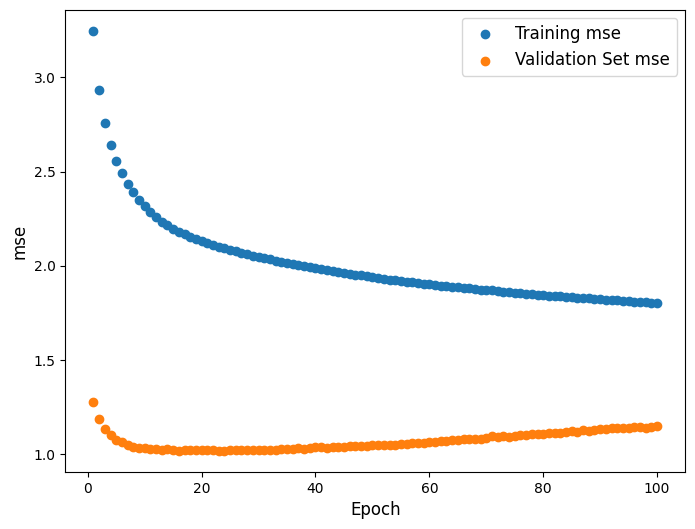

In [183]:
plt.figure(figsize = (8,6))

plt.scatter(range(1,100+1), history_dict['mse'], label = "Training mse")
plt.scatter(range(1,100+1), history_dict['val_mse'], label = "Validation Set mse")

plt.xlabel("Epoch", fontsize=12)
plt.ylabel("mse", fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.legend(fontsize=12)

plt.show()

In [184]:
model=models.Sequential(
    [
    layers.SimpleRNN(return_sequences=False, units=10),
    layers.Dense(units=1)]
)
model.compile(loss="mean_squared_error",metrics=["mse"])
model.fit(X_tt, y_tt,
                    epochs = 25,
                    batch_size=128,
                    validation_data=(X_val,y_val))

Epoch 1/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3.2263 - mse: 3.2263 - val_loss: 1.2837 - val_mse: 1.2837
Epoch 2/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2.6736 - mse: 2.6736 - val_loss: 1.2402 - val_mse: 1.2402
Epoch 3/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2.6785 - mse: 2.6785 - val_loss: 1.2071 - val_mse: 1.2071
Epoch 4/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2.5024 - mse: 2.5024 - val_loss: 1.1818 - val_mse: 1.1818
Epoch 5/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2.4019 - mse: 2.4019 - val_loss: 1.1606 - val_mse: 1.1606
Epoch 6/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2.2080 - mse: 2.2080 - val_loss: 1.1439 - val_mse: 1.1439
Epoch 7/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 2.5603 - mse: 2.5603 - val_loss: 1.1330 - val_mse: 1.1330
Epoch 8/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2.4100 - mse: 2.4100 - val_loss: 1.1232 - val_mse: 1.1232
Epoch 9/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2.284

In [185]:
pred=model.predict(x=X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

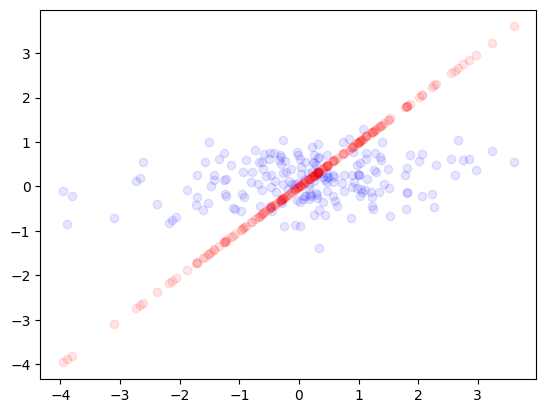

In [186]:
plt.scatter(x=y_test,y=pred,c="b",alpha=0.1,label="pred")
plt.scatter(x=y_test,y=y_test,c="r",alpha=0.1,label="true")
plt.show